# Reproducing some results from Karina Hjelmervik's PhD thesis

Including Hjelmervik and Trulsen (2009)

NOTE THAT THEY USE A non-dimensional wave ray tracer!!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import xarray as xa

import sys,os
testdir = os.path.dirname(os.getcwd() + '/')
srcdir = '..'
sys.path.insert(0, os.path.abspath(os.path.join(testdir, srcdir)))

from wave_tracing import Wave_tracing
import util_solvers as uts

%matplotlib inline

In [2]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [3]:
def c_intrinsic(k,group_velocity=False):
    g=9.81
    if group_velocity:
        return 0.5*np.sqrt(g/k)
    else:
        return np.sqrt(g/k)

## Hjelmerviks paper 1
- see eqs: (3)--(11)
- see fig3

/tmp/ipykernel_15954/3370686875.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,tmp);plt.colorbar();plt.show()


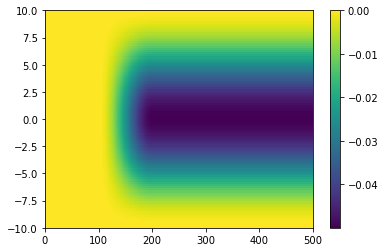

In [126]:
# A current jet 

def current_jet_field(U0,xmax,X,DX, transversal=False):
    ny=100;y = np.linspace(-10,10,ny)
    nx=500;x = np.linspace(0,xmax,nx)
    U = np.zeros((ny,nx))*U0

    #X=200
    #DX = 100
    Y=10

    U[:,X:X+DX]=U0*np.sin((np.pi/(2*DX)) * (x[X:X+DX]-X))**2 
    U[:,X+DX:-1] = U0
    if not transversal:
        U[:,:] *= np.tile(np.cos((np.pi*y)/(2*Y))**2,(nx,1)).T
    
    return x,y,U

x,y,tmp=current_jet_field(-0.05,xmax=500,X=100,DX=100)


plt.pcolormesh(x,y,tmp);plt.colorbar();plt.show()

In [134]:
# Compute the wave rays

nb_wave_rays = 40

T = 200
print("T={}h".format(T/3600))
nt = 500
#wave_period = 2#2*np.pi #s
wave_period = 8#2*np.pi #s
theta0 = np.deg2rad(0) #np.pi/8 #np.pi/4

#x,y,U = current_jet_field(-0.1,xmax=100,X=20,DX=40)
x,y,U = current_jet_field(-0.1,xmax=500,X=100,DX=100)
nx = x.size
dx = np.diff(x)[0]
dy = np.diff(y)[0]
ny = y.size

X0, XN = x[0], x[-1]
Y0, YN = y[0], y[-1]

solver = uts.RungeKutta4

wt = Wave_tracing(U, np.zeros((ny,nx)), nx, ny, nt,T,dx,dy, wave_period, theta0,nb_wave_rays=nb_wave_rays,
                domain_X0=X0, domain_XN=XN,
                domain_Y0=Y0, domain_YN=YN, 
                incoming_wave_side='left',temporal_evolution=False)

wt.set_initial_condition()
wt.solve(solver=solver)
x_rd,y_rd,hm = wt.ray_density(5,5, plot=False)

T=0.05555555555555555h
(1, 100, 500)


/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

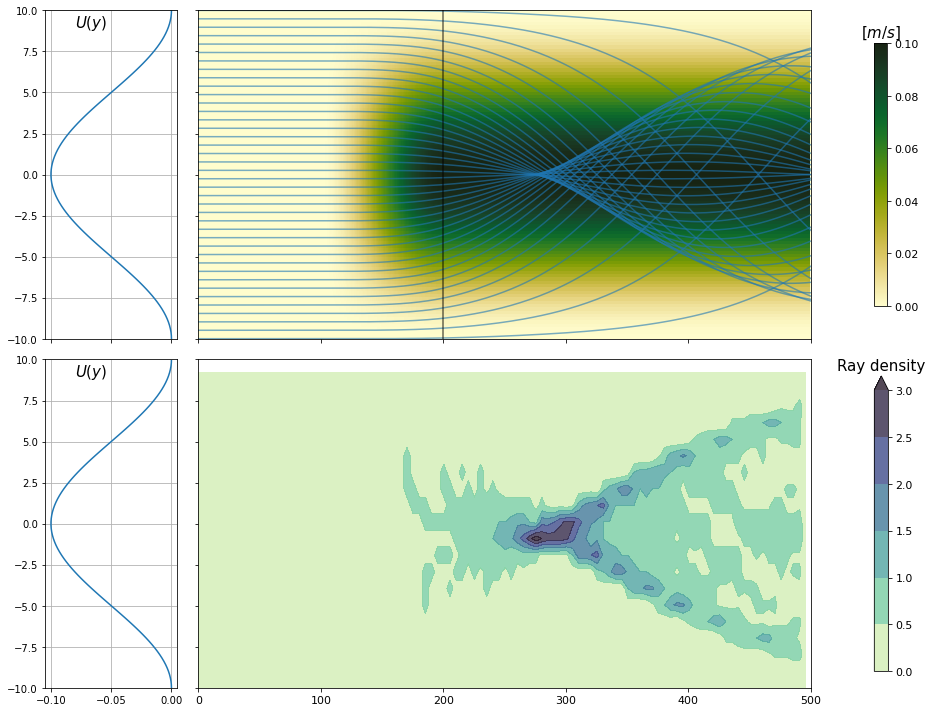

In [135]:
# PLOTTING

vorticity = wt.dvdx-wt.dudy
speed = np.sqrt(wt.U**2 + wt.V**2)


fs=15
#fig,ax = plt.subplots(nrows=2,figsize=(14,10),sharex=True,sharey=True)
fig, ax = plt.subplots(nrows=2,ncols=2,sharex='col',sharey=True,figsize=(14,10),
                       gridspec_kw={'width_ratios': [1, 6]})

#pc=ax[0].pcolormesh(x,y,vorticity[0],cmap=cmocean.cm.curl,vmax=1e-7,vmin=-1e-7)
pc=ax[0,1].pcolormesh(x,y,speed[0,:,:],cmap=cmocean.cm.speed,vmax=0.1,vmin=0,shading='auto')

#qu=ax[0].quiver(x[::2],y[::2],u[::2,::2],v[::2,::2],color='r', scale=12)

for i in range(0,wt.nb_wave_rays):
    ax[0,1].plot(wt.xr[i,:],wt.yr[i,:],'-',c='tab:blue',alpha=0.6)
ax[0,1].set_xlim([X0,XN])
ax[0,1].set_ylim([Y0,YN])

ax[0,1].axvline(200,c='k',alpha=0.6)

for aax in [ax[0,0], ax[1,0]]:
    aax.plot(U[:,200],y)
    aax.grid()
    aax.text(-0.08,9,r'$U(y)$',fontsize=fs)
    


density = ax[1,1].contourf(x_rd,y_rd,hm/5,extend='max',
                         cmap=cmocean.cm.deep,alpha=0.8)


cb0 = fig.colorbar(pc,ax=ax[0,1],orientation='vertical',extend='neither',shrink=0.8, pad=0.08)
cb0.ax.set_title(r'$[m/s]$',fontsize=fs)
cb1 = fig.colorbar(density,ax=ax[1,1],orientation='vertical',shrink=0.9, pad=0.08)
cb1.ax.set_title(r'Ray density',fontsize=fs)

fig.tight_layout()
ax[0,1].tick_params(axis='both',labelsize=fs-4)
ax[1,1].tick_params(axis='both',labelsize=fs-4)
cb0.ax.tick_params(labelsize=fs-4)
cb1.ax.tick_params(labelsize=fs-4)


In [128]:
# A TRANSVERSAL CASE!

nb_wave_rays = 40

T = 200
print("T={}h".format(T/3600))
nt = 500
#wave_period = 2#2*np.pi #s
wave_period = 8#2*np.pi #s
theta0 = np.deg2rad(0) #np.pi/8 #np.pi/4

#x,y,U = current_jet_field(-0.1,xmax=100,X=20,DX=40)
x,y,U = current_jet_field(-0.1,xmax=500,X=100,DX=100,transversal=True)
nx = x.size
dx = np.diff(x)[0]
dy = np.diff(y)[0]
ny = y.size

X0, XN = x[0], x[-1]
Y0, YN = y[0], y[-1]

solver = uts.RungeKutta4

wt_t = Wave_tracing(U, np.zeros((ny,nx)), nx, ny, nt,T,dx,dy, wave_period, theta0,nb_wave_rays=nb_wave_rays,
                domain_X0=X0, domain_XN=XN,
                domain_Y0=Y0, domain_YN=YN, 
                incoming_wave_side='left',temporal_evolution=False)

wt_t.set_initial_condition()
wt_t.solve(solver=solver)
x_rd_t,y_rd_t,hm_t = wt_t.ray_density(5,5, plot=False)

T=0.05555555555555555h
(1, 100, 500)


/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

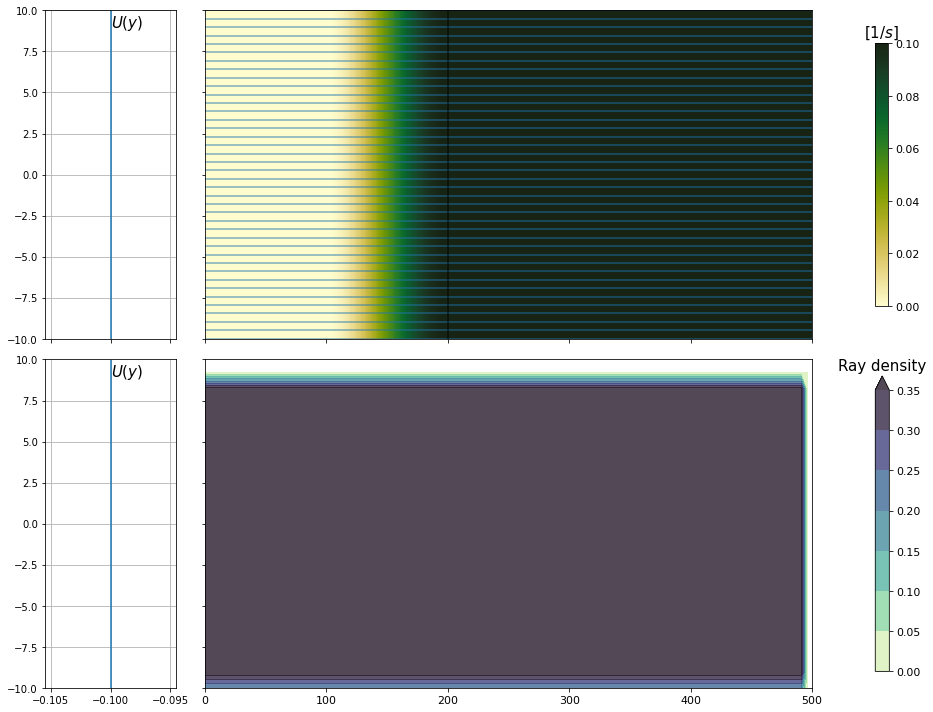

In [133]:
# PLOTTING

speed_t = np.sqrt(wt_t.U**2 + wt_t.V**2)


fs=15
#fig,ax = plt.subplots(nrows=2,figsize=(14,10),sharex=True,sharey=True)
fig, ax = plt.subplots(nrows=2,ncols=2,sharex='col',sharey=True,figsize=(14,10),
                       gridspec_kw={'width_ratios': [1, 6]})

#pc=ax[0].pcolormesh(x,y,vorticity[0],cmap=cmocean.cm.curl,vmax=1e-7,vmin=-1e-7)
pc=ax[0,1].pcolormesh(x,y,speed_t[0,:,:],cmap=cmocean.cm.speed,vmax=0.1,vmin=0,shading='auto')

#qu=ax[0].quiver(x[::2],y[::2],u[::2,::2],v[::2,::2],color='r', scale=12)

for i in range(0,wt_t.nb_wave_rays):
    ax[0,1].plot(wt_t.xr[i,:],wt_t.yr[i,:],'-',c='tab:blue',alpha=0.6)
ax[0,1].set_xlim([X0,XN])
ax[0,1].set_ylim([Y0,YN])

ax[0,1].axvline(200,c='k',alpha=0.6)

for aax in [ax[0,0], ax[1,0]]:
    aax.plot(U[:,200],y)
    aax.grid()
    aax.text(-0.1,9,r'$U(y)$',fontsize=fs)
    


density = ax[1,1].contourf(x_rd_t,y_rd_t,hm_t/5,extend='max',
                         cmap=cmocean.cm.deep,alpha=0.8)


cb0 = fig.colorbar(pc,ax=ax[0,1],orientation='vertical',extend='neither',shrink=0.8, pad=0.08)
cb0.ax.set_title(r'$[1/s]$',fontsize=fs)
cb1 = fig.colorbar(density,ax=ax[1,1],orientation='vertical',shrink=0.9, pad=0.08)
cb1.ax.set_title(r'Ray density',fontsize=fs)

fig.tight_layout()
ax[0,1].tick_params(axis='both',labelsize=fs-4)
ax[1,1].tick_params(axis='both',labelsize=fs-4)
cb0.ax.tick_params(labelsize=fs-4)
cb1.ax.tick_params(labelsize=fs-4)

In [ ]:

#velocity field 
"""
X = 2000 #m
Y = 1500 #m

nx, ny = (200,101)
x = np.linspace(0, X, nx)
y = np.linspace(-Y, Y, ny)
xv, yv = np.meshgrid(x, y)
y_id = np.arange(ny)
x_id = np.arange(nx)
"""

ny=100;y = np.linspace(-20,20,ny)
nx=500;x = np.linspace(0,500,nx)




In [ ]:
# TRANSVERSAL CURRENT
U0=-0.05
U = np.zeros((ny,nx))

X=200
DX = 100

U[:,X:X+DX]=U0*np.sin((np.pi/(2*DX)) * (x[X:X+DX]-X))**2
U[:,X+DX:-1] = U0
plt.pcolormesh(x,y,U);plt.colorbar();plt.show()



In [ ]:
# Current jet 

U_jet = np.zeros((ny,nx))
Y=10

U_jet[:,X:X+DX]=U0*np.sin((np.pi/(2*DX)) * (x[X:X+DX]-X))**2 
U_jet[:,X+DX:-1] = U0
U_jet[:,:] *= np.tile(np.cos((np.pi*y)/(2*Y))**2,(nx,1)).T
plt.pcolormesh(x,y,U_jet);plt.colorbar();plt.show()


In [ ]:
plt.plot(np.cos((np.pi*y)/(2*Y))**2)
#U_jet[:,X+DX:-1].shape

In [ ]:
U0 = .3
Y = np.max(y)*2
U_y = U0*np.cos((np.pi*y)/Y)**2

U = (np.ones((nx,ny))*U_y).T
V = np.zeros((ny,nx))

#TEST V
#V = np.ones((ny,nx))
#V_x = .03*np.sin((np.pi*x)/np.max(x)*2)**2
#V*=V_x

#plt.imshow(U);plt.colorbar()

dudy, dudx = np.gradient(U)
dvdy, dvdx = np.gradient(V)

fig,ax = plt.subplots(1,2,figsize=(15,6))
pc0 = ax[0].pcolormesh(x,y,U)
fig.colorbar(pc0,ax=ax[0])
pc1 = ax[1].pcolormesh(x,y,V)
fig.colorbar(pc1,ax=ax[1])

In [ ]:
# A deep water wave
g = 9.81
T = 5 #s
sigma = (2*np.pi)/T
k0 = (sigma**2)/g
c_i = c_intrinsic(k0)
cg_i = c_intrinsic(k0,group_velocity=True)

phi = 0#np.pi/4 #radians
kx0 = k0*np.cos(phi)
ky0 = k0*np.sin(phi)

In [ ]:
T = 800
nt = int(T*2.1)#800
dt = T/nt
t = np.linspace(0,T,nt)

xx = np.zeros((len(U_y),nt))
yy = np.zeros((len(U_y),nt))
#xx.mask=False
#yy.mask=False
kx = np.zeros((len(U_y),nt))#np.zeros(nt)
ky = np.zeros((len(U_y),nt))#np.zeros(nt)
k = np.zeros((len(U_y),nt))#np.zeros(nt)
xx[:,0]=0
yy[:,0]=y
kx[:,0]=kx0
ky[:,0]=ky0
k[:,0]=k0

#dudm = np.gradient(U_y)
#theta = np.ma.zeros((len(U_y),nt))
#theta[0] = 0
theta2 = np.ma.zeros((len(U_y),nt))
theta2[:,0] = np.arctan(ky[:,0]/kx[:,0])


In [ ]:
for n in range(0,nt-1):    
    
    #theta[:,n+1] = theta[:,n] - dt*dudm
    theta2[:,n+1] = np.arctan(ky[:,n]/kx[:,n])
    
    cg_i = c_intrinsic(k[:,n],group_velocity=True)
    
    cg_i_x =  cg_i*np.cos(theta2[:,n])
    cg_i_y =  cg_i*np.sin(theta2[:,n])

    #idx = find_nearest(x,xx[:,n])
    #idy = find_nearest(y,yy[:nn])
    idxs = np.array([find_nearest(x,xval) for xval in xx[:,n]])
    idys = np.array([find_nearest(y,yval) for yval in yy[:,n]])
    #print(n,idys)
    #                [find_nearest(y,yval) for yval in yy[:,n]]
    #print(idx,idy)
    
    xx[:,n+1] = xx[:,n] + dt*(cg_i_x+U[idys,idxs])
    yy[:,n+1] = yy[:,n] + dt*(cg_i_y+V[idys,idxs])
    #print((U[idys,idxs]))
    #print(cg_intrinsic(ky[n]),V[idy,idx]y
    

    kx[:,n+1] = kx[:,n] - dt*(kx[:,n]*dudx[idys,idxs] + ky[:,n]*dvdx[idys,idxs])
    ky[:,n+1] = ky[:,n] - dt*(kx[:,n]*dudy[idys,idxs] + ky[:,n]*dvdy[idys,idxs])
    k[:,n+1] = np.sqrt(kx[:,n+1]**2+ky[:,n+1]**2)
    
    #if n ==50:
    #    break

    


In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
pc=ax.pcolormesh(x,y,U)
for i in range(5,ny-1,5):
    ax.plot(xx[i,:],yy[i,:],'-k')

idts = np.arange(0,nt,40)
plt.plot(xx[:,idts],yy[:,idts],'--k')
cb = fig.colorbar(pc)
ax.set_xlim(x[0],x[-1])
ax.set_ylim(y[0],y[-1])

#fig.savefig('figures/wt_test_co_3.png')

In [ ]:
# TEST with solver:
from wave_tracing_FE import Wave_tracing_FE

#velocity field 
X = 2000 #m
Y = 1500 #m

nx, ny = (200,101)
x = np.linspace(0, X, nx)
y = np.linspace(-Y, Y, ny)
xv, yv = np.meshgrid(x, y)
y_id = np.arange(ny)
x_id = np.arange(nx)

wt = Wave_tracing_FE(U, V, nx, ny, nt,T,np.diff(x)[0], np.diff(y)[0], 5, 0,nb_wave_rays=101,
                domain_X0=0, domain_XN=X,
                domain_Y0=y[0], domain_YN=y[-1], 
                incoming_wave_side='left')

wt.set_initial_condition()
wt.solve()

In [ ]:
y

In [ ]:
# PLOTTING
import cmocean

vorticity = wt.dvdx-wt.dudy
speed = np.sqrt(U**2+V**2)

fs=15
fig,ax = plt.subplots(nrows=1,figsize=(14,10))
pc=ax.pcolormesh(x,y,speed,cmap=cmocean.cm.speed)
#qu=ax[0].quiver(yy[::2],xx[::2],uu[::2,::2],vv[::2,::2],color='r', scale=12)

for i in range(0,wt.nb_wave_rays):
    ax.plot(wt.xr[i,:],wt.yr[i,:],'-k',alpha=0.6)
#ax[0].set_xlim([x[0],x)
ax.set_ylim([y[0],y[-1]])



cb0 = fig.colorbar(pc,ax=ax,orientation='vertical',extend='neither',shrink=0.8, pad=0.08)
cb0.ax.set_title(r'$[m/s]$',fontsize=fs)

fig.tight_layout()
ax.tick_params(axis='both',labelsize=fs-4)


In [ ]:
idt=250
plt.plot(xx[:,idt],yy[:,idt])

In [ ]:
plt.pcolormesh(t,y,theta2);plt.colorbar()